This is one of my inclass assignments where we took data from a website that reports UFO incidents in Alaska from 1943 until now 

In [91]:
# your code here
# you should use requests to get the webpage, then extract 
# the appropriate column headings and rows
# then write this out to csv to a local file called 'ufo_alaska.csv'
import urllib  

url = "http://www.nuforc.org/webreports/ndxlAK.html"

page = urllib.request.urlopen(url)

In [92]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(page, 'html.parser')

In [93]:
table = soup.find_all("table")
for t in table: 
    headers = [head.get_text() for head in t.find_all('thead')]
    rows = [] 
    for r in t.find_all('tr'): 
        rows.append([val.get_text() for val in r.find_all('td')])
        

In [94]:
a = list(headers[0].split('\n'))
header = [] 
for i in range(len(a)-1): 
    if a[i] != '': 
        header.append(a[i])


In [96]:

import csv 
with open('ufo.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(row for row in rows if row)

Once you have your local csv file, you should read it in and then issue the .head() command.

In [450]:
# your code here
import pandas as pd 
df = pd.read_csv('ufo.csv', encoding = "ISO-8859-1")
df_2 = df.copy()
df

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,8/22/20 01:00,Anchorage Ak,AK,Circle,1 minute,One craft seen much lower and moving slower th...,8/27/20
1,8/21/20 10:15,Anchorage,AK,Disk,10-12 minutes,Elmendorf Airbase launched 3 F-22 jets with af...,8/27/20
2,8/20/20 04:00,Anchorage,AK,Triangle,45 minonds,"Spinning pyramid with red, green, blue lights,...",8/27/20
3,8/17/20 00:30,Bethel,AK,Triangle,3-4 minutes,Black Triangle UFO in Alaska,8/20/20
4,4/9/20 10:15,54.690 163.771,AK,Changing,8 minutes,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20
...,...,...,...,...,...,...,...
434,6/30/57,Arctic,AK,Cigar,one day,spacecraft found in artic between 1953 to1961 ...,8/24/10
435,2/1/54 02:00,Fairbanks,AK,Unknown,19 MIN.,RADAR INTERCEPT OF UFO BY USAF PILOT IN ALASKA...,1/10/09
436,7/1/49 11:00,Fairbanks,AK,Disk,2 minutes,"Enormous metallic disc in Alaska sky, 1949.",12/23/13
437,4/30/43 23:00,Bering Sea,AK,Other,1 hour,1943 sighting of four linearly arranged red li...,3/19/09


In [651]:
import re
import numpy as np


In [302]:
# your code here 
# filter our invalid durations
# convert all valid durations to seconds
def convert_sec(x): 
    if len(x) > 1: 
        a = re.sub('[-]','',str(x[1]))
        a = a.strip()
        conversion = {'second':1,'seconds':1,'days':86400,'day':86400,'hr':3600, 'hrs':3600,
                      'hour':3600,'hours':3600,'min': 60, 'mins':60, 'sec':1, 'secs':1,
                      'MIN.':60, 'minute':60,'minutes':60,'weeks':604800,'week':604800}
        if 'min' in a: 
            a = 'minute'
        if a in conversion:
            return (int(x[0])*conversion[a])
def is_valid(x): 
    y = ['second','seconds','days','day','hour','hours','minute','minutes','months','month','weeks','week'] 
    z = str(x)
    if len(z) < 3: 
        return 0 
    else: 
        z=z.split()
        if len(z) > 1: 
            if (z[0].isdigit()) and (z[1].strip() in y) : 
                return convert_sec(z)
        return 0
df_2['Duration']=df_2['Duration'].apply(is_valid)
df_2.head(21)

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,8/22/20 01:00,Anchorage Ak,AK,Circle,60,One craft seen much lower and moving slower th...,8/27/20
1,8/21/20 10:15,Anchorage,AK,Disk,0,Elmendorf Airbase launched 3 F-22 jets with af...,8/27/20
2,8/20/20 04:00,Anchorage,AK,Triangle,0,"Spinning pyramid with red, green, blue lights,...",8/27/20
3,8/17/20 00:30,Bethel,AK,Triangle,0,Black Triangle UFO in Alaska,8/20/20
4,4/9/20 10:15,54.690 163.771,AK,Changing,480,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20
5,3/30/20 21:30,Seward,AK,Light,0,Reports from witnesses in different locations ...,6/25/20
6,3/30/20 01:18,Point Makenzie,AK,Light,1800,"I don't know if I'm correct but, I just stare ...",6/25/20
7,3/23/20 12:00,Juneau,AK,Changing,1800,Yellow light craft That changes shapes over Ju...,5/21/20
8,3/12/20 20:57,Eagle River,AK,Circle,240,Two bright flying objects flying above Eagle R...,6/25/20
9,3/6/20 05:30,Point Mackenzie,AK,Unknown,0,"I only heard it, it sounded like a jet at a sp...",5/1/20


In [332]:
# your code here
# total rows in original dataset
# valid rows in your new 'validated' dataset
print(len(df_2))
print(len(df_2[(df_2['Duration'] > 0)]))

439
273


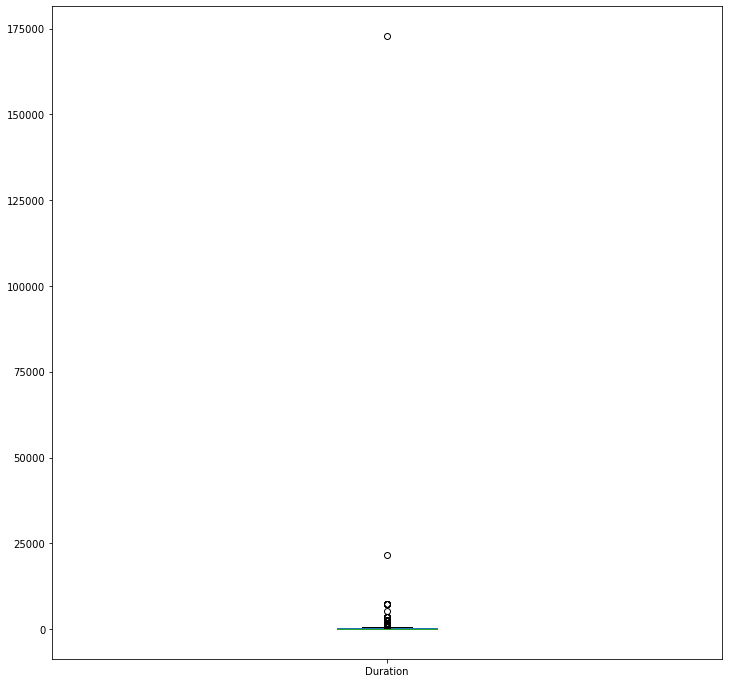

In [356]:
# your code here
# boxplot code here
fig_1 = df_2.boxplot(column=['Duration'], grid = False, figsize = (12,12))

Zoom in the boxplot section

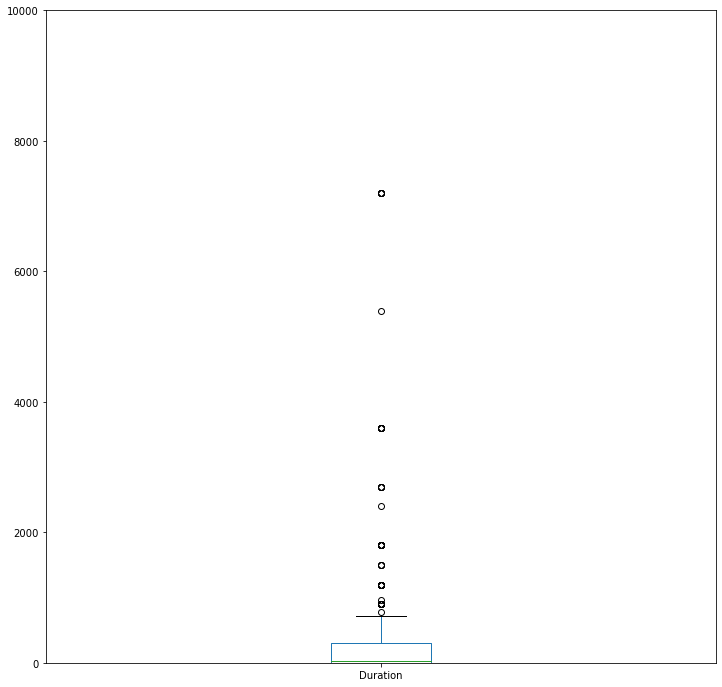

In [357]:
fig_1.set_ylim([0,10000])
fig_1.figure

Interesting. But we threw away a **lot** of data. We can do better. For this part, you will do your best to clean up the durations from your original dataset. Keep in mind some initial guidelines:

* If a duration has a range, use the average as its value. For example, if the duration is listed as “6-8 minutes”, you should consider the duration as “7 minutes”. (Again, you will need to eventually convert minutes into seconds).
* If a duration has a “<” sign, you should simply ignore the “<” sign. For example if the duration is specified as “< 1 minute”, consider the duration to be “1 minute”. You should subsequently convert “1 minute” to "60 seconds".
* If a duration has a “>” sign, you should simply ignore the “>” sign. 
* You should ignore any row with an empty duration.

You will probably have to improvise as you go along, so make detailed notes of what decisions you are making and why.

In [333]:
#replace > < @ + 
df['Duration']=df['Duration'].str.replace('[>\<\@\+\~\?]','')
df_3 = df.copy()
#create a copy of the original df for freedom of use
df_3[df_3['Duration'].notnull() == True]
df_3['Duration'] = df_3['Duration'].astype(str)
df_3 = df_3[df_3['Duration'].apply(lambda x: any(map(str.isdigit, x))) == True]
df_3

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,8/22/20 01:00,Anchorage Ak,AK,Circle,1 minute,One craft seen much lower and moving slower th...,8/27/20
1,8/21/20 10:15,Anchorage,AK,Disk,10-12 minutes,Elmendorf Airbase launched 3 F-22 jets with af...,8/27/20
2,8/20/20 04:00,Anchorage,AK,Triangle,45 minonds,"Spinning pyramid with red, green, blue lights,...",8/27/20
3,8/17/20 00:30,Bethel,AK,Triangle,3-4 minutes,Black Triangle UFO in Alaska,8/20/20
4,4/9/20 10:15,54.690 163.771,AK,Changing,8 minutes,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20
...,...,...,...,...,...,...,...
433,10/1/57 16:00,Nelchina (near),AK,Unknown,3 minutes maximum,This incident occurred about October of 1956 o...,12/7/06
435,2/1/54 02:00,Fairbanks,AK,Unknown,19 MIN.,RADAR INTERCEPT OF UFO BY USAF PILOT IN ALASKA...,1/10/09
436,7/1/49 11:00,Fairbanks,AK,Disk,2 minutes,"Enormous metallic disc in Alaska sky, 1949.",12/23/13
437,4/30/43 23:00,Bering Sea,AK,Other,1 hour,1943 sighting of four linearly arranged red li...,3/19/09


There are only 399 rows out of 439 rows that have a valid duration (meaning there is at least a digit with a valid time unit in that row, any row that has things like 'instant' or NaN would be filtered out)

In [337]:
#function to calculate average in duration
def avg_digit(x): 
    a = [int(i) for i in re.findall(r"\d+", x)]  #find all digits in the str duration 
    mean = [np.mean(a)]                          #get average
    text = re.sub(r"\d", "", x)                   
    mean.append(text)                           #create a list of digit and tex
    return convert_sec(mean)


In [334]:
df_3['Duration'] = df_3['Duration'].apply(avg_digit)


In [335]:
df_3

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,8/22/20 01:00,Anchorage Ak,AK,Circle,60.0,One craft seen much lower and moving slower th...,8/27/20
1,8/21/20 10:15,Anchorage,AK,Disk,660.0,Elmendorf Airbase launched 3 F-22 jets with af...,8/27/20
2,8/20/20 04:00,Anchorage,AK,Triangle,2700.0,"Spinning pyramid with red, green, blue lights,...",8/27/20
3,8/17/20 00:30,Bethel,AK,Triangle,180.0,Black Triangle UFO in Alaska,8/20/20
4,4/9/20 10:15,54.690 163.771,AK,Changing,480.0,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20
...,...,...,...,...,...,...,...
433,10/1/57 16:00,Nelchina (near),AK,Unknown,180.0,This incident occurred about October of 1956 o...,12/7/06
435,2/1/54 02:00,Fairbanks,AK,Unknown,1140.0,RADAR INTERCEPT OF UFO BY USAF PILOT IN ALASKA...,1/10/09
436,7/1/49 11:00,Fairbanks,AK,Disk,120.0,"Enormous metallic disc in Alaska sky, 1949.",12/23/13
437,4/30/43 23:00,Bering Sea,AK,Other,3600.0,1943 sighting of four linearly arranged red li...,3/19/09


In [336]:
# your code here
# total rows in original dataset
# valid rows in your cleaned dataset
print(len(df))
print(len(df_3[(df_3['Duration'].notnull() == True)]))

439
372


In [341]:
import matplotlib.pyplot as plt


In [ ]:
# your code here
# total rows in original dataset
# valid rows in your cleaned dataset

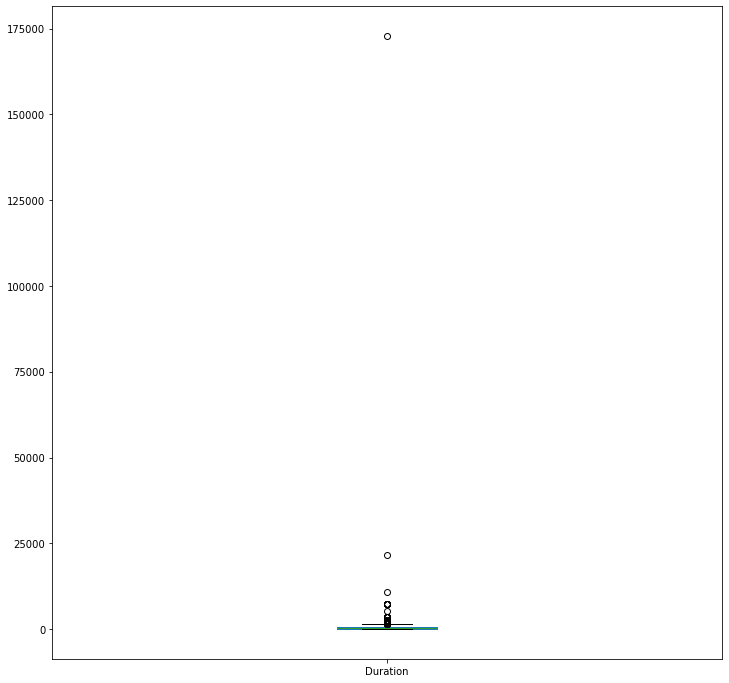

In [350]:
# your code here
# draw a boxplot for your cleaned dataset
fig = df_3.boxplot(column=['Duration'], grid = False, figsize = (12,12))


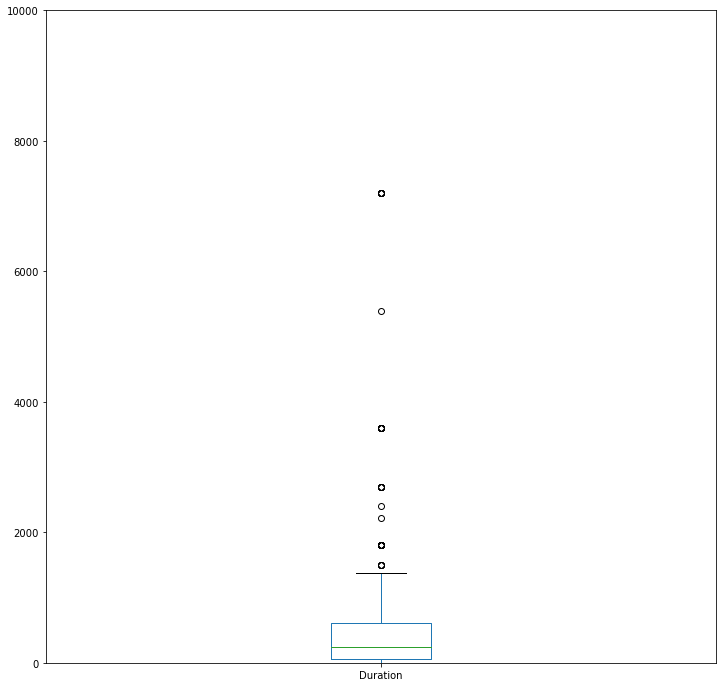

In [359]:
fig.set_ylim([0,10000])
fig.figure


Now, revisit your two boxplots -- for the initial "valid" dataset and then for your cleaned dataset. What do you observe? What differences does cleaning have? Would you imagine your downstream analyses would be affected by this cleaning step? Explain.

`Discussion: Add your discussion here`

Comparing these two boxplots, I can see that both have outliers. However, the first one has a very skewed distribution and a lot more outliers than the second one. The median of the first boxplot is near 0, which shows that 50% of the duration was really short, while that of the second one lies at approx. 100 secs after being cleaned. 
It shows the importance of a clean dataset. Without cleaning, there would be a significant margin of error if further analyses are done

## (30 points) Part 3: Aliens, aliens everywhere.
Finally, let's begin our initial analysis of the cleaned UFO dataset. In this section, we're going to do some plotting with matplotlib and draw some initial conclusions that may guide our future study of this UFO dataset. 

Which **shapes** are most observed?

###### Do different UFO shapes have different durations?

In [607]:
a=df['Shape'].value_counts()
a


Light        103
Circle        53
Triangle      35
Unknown       31
Disk          30
Fireball      29
Sphere        27
Other         22
Oval          19
Flash         15
Formation     14
Changing      11
Rectangle      9
Cylinder       8
Diamond        8
Cigar          7
Cone           1
Teardrop       1
Cross          1
Egg            1
Chevron        1
Name: Shape, dtype: int64

Shapes most observed are "Light", "Circle", "Triangle", "Unknown", "Disk", which are the most common descriptions of UFOs

In [616]:
shape = []
b = df_3["Shape"].value_counts()
for k, v in b.items():
    shape.append(k)
shape


['Light',
 'Circle',
 'Triangle',
 'Unknown',
 'Disk',
 'Fireball',
 'Sphere',
 'Other',
 'Oval',
 'Formation',
 'Flash',
 'Changing',
 'Rectangle',
 'Cylinder',
 'Diamond',
 'Cigar',
 'Teardrop',
 'Cross',
 'Egg',
 'Chevron']

use the filter dataset to get duration but plot with the original dataset for the most accurate count of shapes

Text(0.5, 0, 'shapes')

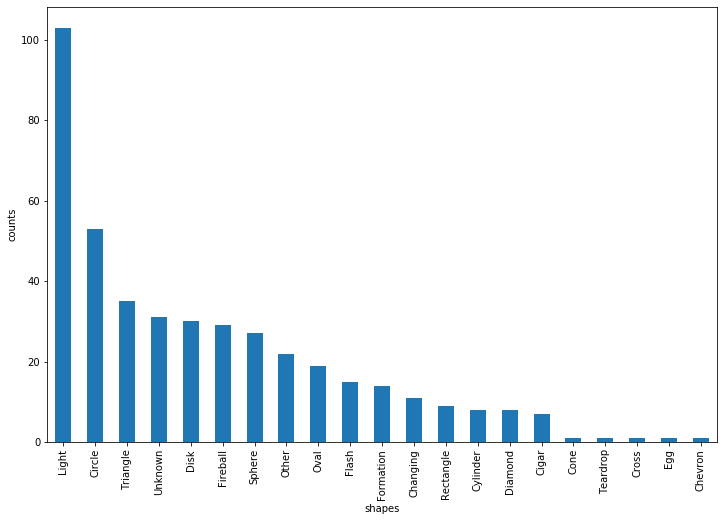

In [606]:
plt.figure(figsize=(12,8))
df['Shape'].value_counts().plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('shapes')

Text(0, 0.5, 'duration')

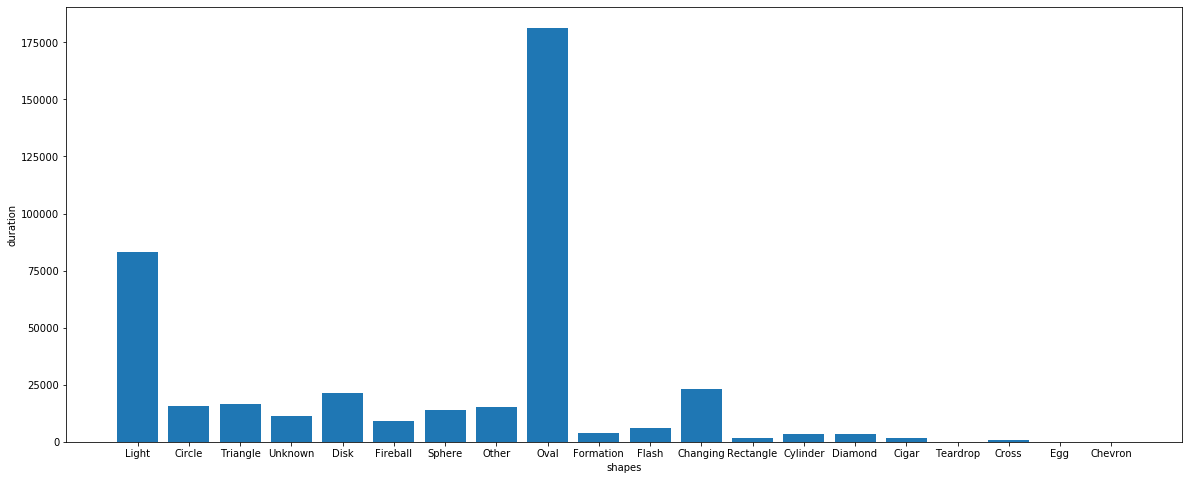

In [652]:
# your code here
# create a plot of shapes/duration
plt.figure(figsize=(20,8))
duration = {}
df_4 = df_3.groupby(["Shape",'Duration']).size()
for j in shape: 
    value = 0
    for k,v in df_4[j].items():
        value += k*v
    duration[j] = value 
plt.bar(duration.keys(), duration.values())
plt.xlabel("shapes")
plt.ylabel("duration")

Are there more UFO sightings in recent years than in the past?

In [650]:
# your code her
# you might want to bucket the sightings into years
# or perhaps you have some other ideas. we are flexible.
df["Date / Time"] = pd.to_datetime(df["Date / Time"])\

year = pd.datetime.today().year

df["Date / Time"].loc[df["Date / Time"].dt.year.gt(year)] -= pd.DateOffset(years=100)

a = df.groupby(df["Date / Time"].dt.year).size()
a

Date / Time
1943.0     1
1949.0     1
1954.0     1
1957.0     2
1966.0     1
1967.0     1
1968.0     1
1969.0     1
1974.0     1
1976.0     1
1977.0     1
1978.0     3
1983.0     1
1986.0     3
1987.0     1
1988.0     1
1989.0     1
1995.0     2
1996.0     1
1997.0     1
1998.0     2
2000.0     2
2001.0     2
2002.0     1
2003.0     2
2004.0     2
2005.0     6
2006.0    13
2007.0     8
2008.0    15
2009.0    17
2010.0    16
2011.0    18
2012.0    48
2013.0    53
2014.0    43
2015.0    39
2016.0    43
2017.0    21
2018.0    25
2019.0    20
2020.0    16
dtype: int64

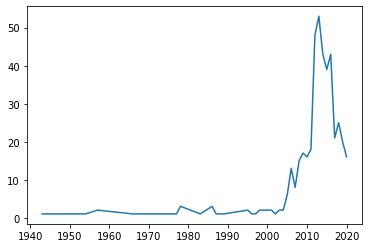

In [649]:
plt.plot(a.index, a.values)

There was a sharp increase in UFO sightings in AK from 2006 to 2015. Since then, the trend seems to go down every year.

Based on your observations and analyses, what are some important next steps we should take?

`Discussion: Add your discussion here`

- We can group the data based on location observed (cities). It is likely that people tend to catch sight of more UFOs in the rural areas than in cities, towns.. 

- There are some typos and punctuation which can be fixed 

- We can filter out unwanted outlier (there is a chance that an UFO could not have showed up for the whole 2 days) 

- Finally can perform some statistical inference on some of the columns such as "Duration" and "shape"